In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
data=pd.read_csv("/content/50_Startups.csv")

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.isna().sum() #no null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [ ]:
data.duplicated().sum()

0

{'boxes': [<matplotlib.lines.Line2D at 0x7f80a6ba9550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80a6bb8f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80a6bc0fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80a6bc0a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80a6bb8510>,
  <matplotlib.lines.Line2D at 0x7f80a6bb8a50>]}

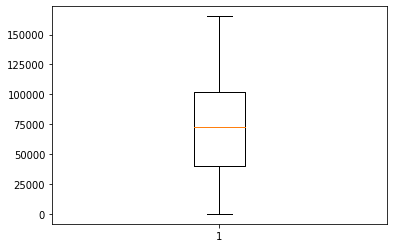

In [ ]:
data_RDSpend=data['R&D Spend']
plt.boxplot(data_RDSpend)

{'boxes': [<matplotlib.lines.Line2D at 0x7f80a668db90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80a6695b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80a669cbd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80a669c690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80a6695110>,
  <matplotlib.lines.Line2D at 0x7f80a6695650>]}

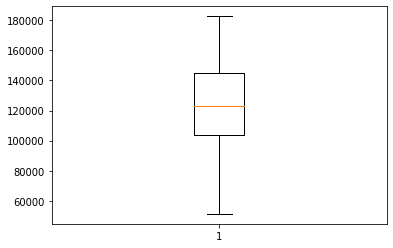

In [ ]:
data_Admin=data['Administration']
plt.boxplot(data_Admin)

{'boxes': [<matplotlib.lines.Line2D at 0x7f80a6609190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80a6611190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80a661a1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80a6611c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80a66096d0>,
  <matplotlib.lines.Line2D at 0x7f80a6609c10>]}

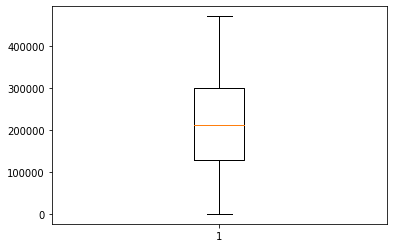

In [ ]:
data_market=data['Marketing Spend']
plt.boxplot(data_market)

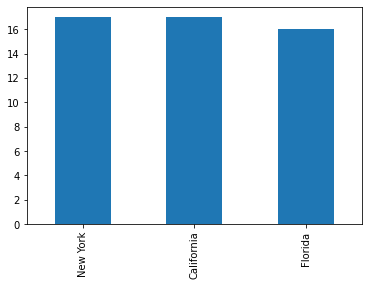

In [ ]:
data['State'].value_counts().plot.bar()

In [ ]:
#cagegorical data
obj_column=data[['State']]

In [ ]:
obj_column.isnull().sum()

State    0
dtype: int64

In [ ]:
obj_column

,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [ ]:
obj_column.shape

(50, 1)

Dummy Variables

In [ ]:
data_dummy=pd.get_dummies(data,columns=['State'])

In [ ]:
data_dummy

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [ ]:
data=data_dummy

In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
array=data.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX1=scaler.fit_transform(array)
#transformed data
set_printoptions(precision=2)
print(rescaledX1[:,:])

[[1.   0.65 1.   1.   0.   0.   1.  ]
 [0.98 0.76 0.94 1.   1.   0.   0.  ]
 [0.93 0.38 0.86 0.99 0.   1.   0.  ]
 [0.87 0.51 0.81 0.95 0.   0.   1.  ]
 [0.86 0.31 0.78 0.85 0.   1.   0.  ]
 [0.8  0.37 0.77 0.8  0.   0.   1.  ]
 [0.81 0.73 0.27 0.8  1.   0.   0.  ]
 [0.79 0.72 0.69 0.79 0.   1.   0.  ]
 [0.73 0.74 0.66 0.77 0.   0.   1.  ]
 [0.75 0.44 0.65 0.76 1.   0.   0.  ]
 [0.62 0.45 0.49 0.74 0.   1.   0.  ]
 [0.61 0.31 0.53 0.73 1.   0.   0.  ]
 [0.57 0.58 0.53 0.71 0.   1.   0.  ]
 [0.56 0.64 0.54 0.67 1.   0.   0.  ]
 [0.73 0.8  0.54 0.66 0.   1.   0.  ]
 [0.69 0.54 0.55 0.65 0.   0.   1.  ]
 [0.47 0.54 0.56 0.63 1.   0.   0.  ]
 [0.57 0.71 0.6  0.62 0.   0.   1.  ]
 [0.55 0.48 0.63 0.62 0.   1.   0.  ]
 [0.52 0.78 0.   0.61 0.   0.   1.  ]
 [0.46 0.48 0.63 0.58 1.   0.   0.  ]
 [0.47 0.78 0.64 0.54 0.   0.   1.  ]
 [0.45 0.54 0.64 0.54 0.   1.   0.  ]
 [0.41 0.41 0.65 0.53 0.   1.   0.  ]
 [0.47 0.37 0.3  0.53 0.   0.   1.  ]
 [0.39 0.67 0.29 0.52 1.   0.   0.  ]
 [0.46 0.71 

In [ ]:
model=smf.ols("data['Profit']~data['R&D Spend']+data['Administration']+data['Marketing Spend']+data['State_California']+data['State_Florida']+data['State_New York']", data=data).fit()

In [ ]:
model.params

Intercept                   37633.233317
data['R&D Spend']               0.806023
data['Administration']         -0.027004
data['Marketing Spend']         0.026980
data['State_California']    12492.110514
data['State_Florida']       12690.899307
data['State_New York']      12450.223495
dtype: float64

In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept                    7.417409
data['R&D Spend']           17.368580
data['Administration']      -0.517012
data['Marketing Spend']      1.573889
data['State_California']     5.099242
data['State_Florida']        4.654306
data['State_New York']       5.007401
dtype: float64 
 Intercept                   2.807645e-09
data['R&D Spend']           2.578772e-21
data['Administration']      6.077373e-01
data['Marketing Spend']     1.226769e-01
data['State_California']    6.942555e-06
data['State_Florida']       2.992503e-05
data['State_New York']      9.409010e-06
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [ ]:
model1=smf.ols("data['Profit']~data['R&D Spend']+data['Administration']+data['Marketing Spend']", data=data).fit()

In [ ]:
model1.params

Intercept                  50122.192990
data['R&D Spend']              0.805715
data['Administration']        -0.026816
data['Marketing Spend']        0.027228
dtype: float64

In [ ]:
model2=smf.ols("data['Profit']~data['R&D Spend']+data['Administration']", data=data).fit()


In [ ]:
model2.params

Intercept                 54886.620628
data['R&D Spend']             0.862118
data['Administration']       -0.052995
dtype: float64

In [ ]:
model2.pvalues

Intercept                 5.695336e-12
data['R&D Spend']         2.278348e-31
data['Administration']    2.888932e-01
dtype: float64

In [ ]:
model3=smf.ols("data['Profit']~data['R&D Spend']+data['Marketing Spend']", data=data).fit()

In [ ]:
model3.rsquared

0.9504503015559763

In [ ]:
model1.rsquared

0.9507459940683246

In [ ]:
model2.rsquared

0.9478129385009173

In [ ]:
model.rsquared

0.9507524843355148

In [ ]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept                   7.626218
data['R&D Spend']          17.846374
data['Administration']     -0.525507
data['Marketing Spend']     1.655077
dtype: float64 
 Intercept                  1.057379e-09
data['R&D Spend']          2.634968e-22
data['Administration']     6.017551e-01
data['Marketing Spend']    1.047168e-01
dtype: float64


In [ ]:
(model1.rsquared, model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Calculating VIF

In [ ]:
rsq_RDSpend=smf.ols("data['R&D Spend']~data['Administration']+data['Marketing Spend']",data=data).fit().rsquared
vif_RDSpend=1/(1-rsq_RDSpend)

rsq_Admin=smf.ols("data['Administration']~data['R&D Spend']+data['Marketing Spend']", data=data).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_Market=smf.ols("data['Marketing Spend']~data['Administration']+data['R&D Spend']", data=data).fit().rsquared
vif_Market=1/(1-rsq_Market)
d1={'Variables':['R&D Spend', 'Administration', 'Marketing Spend'], 'Rsquared':[rsq_RDSpend, rsq_Admin, rsq_Market], 'VIF':[vif_RDSpend, vif_Admin, vif_Market]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,Rsquared,VIF
0,R&D Spend,0.594962,2.468903
1,Administration,0.149002,1.175091
2,Marketing Spend,0.570220,2.326773


In [ ]:
# not possible to build vif for state variables as divide by zero error encountered
rsq_state_cali=smf.ols("data['State_California']~data['R&D Spend']+data['Administration']+data['Marketing Spend']+data['State_Florida']+data['State_New York']",data=data).fit().rsquared
vif_state_cali=1/(1-rsq_state_cali)
vif_state_cali

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


inf

Test for Normality of Residuals (Q-Q plot)

<function matplotlib.pyplot.show>

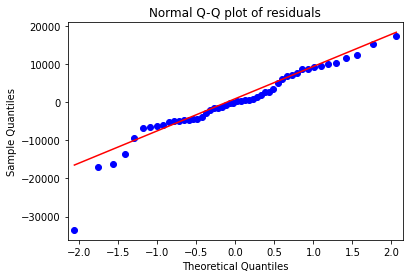

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show

Q-Q plot outliers

In [ ]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

Cooks distance

In [ ]:
model_influence_V=model.get_influence()
(c_V,_)=model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

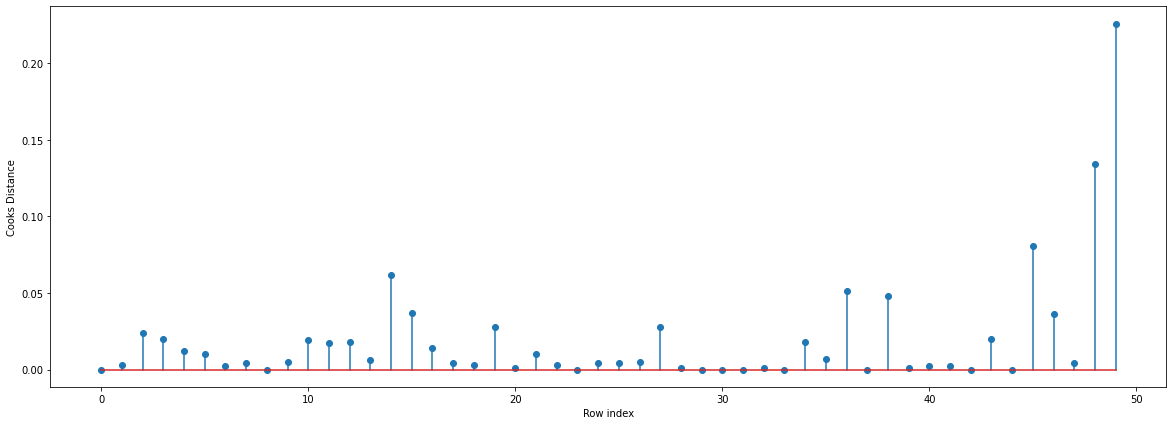

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
(np.argmax(c_V),np.max(c_V))

(49, 0.22625094501509282)

influencers

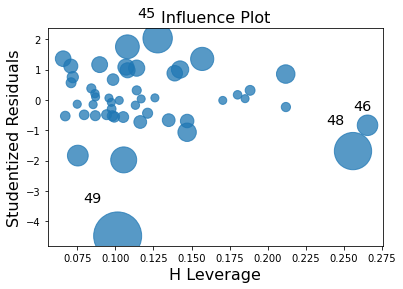

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k=data.shape[1]
n=data.shape[0]
levarage_cutoff=3*((k+1)/n)

In [ ]:
levarage_cutoff

0.48

In [ ]:
#hence no high leverage values present as seen in the above influence plot

In [ ]:
#choose the model params and the rsqured value and also state that there are no influencers and although 49 is a high outlier, its removal does not affect the final multiple linear regression model

In [ ]:
toyota=pd.read_csv("/content/ToyotaCorolla.csv", encoding='latin1')

In [ ]:
toyota.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [ ]:
toyota.duplicated().sum()

0

In [ ]:
toyota.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

{'boxes': [<matplotlib.lines.Line2D at 0x7f80a141f550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f80a14a9990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f80a13ef510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f80a13ef6d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f80a14a9850>,
  <matplotlib.lines.Line2D at 0x7f80a14a95d0>]}

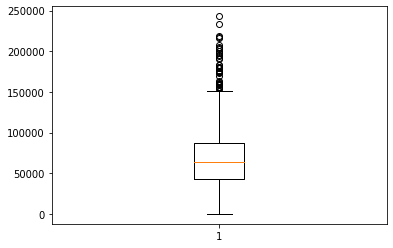

In [ ]:
plt.boxplot(toyota['KM'])

In [ ]:
toyota.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [ ]:
model_cars=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=toyota).fit()

In [ ]:
model_cars.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
model_cars.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [ ]:
model_cars.rsquared

0.8637627463428191

In [ ]:
model_cars1=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight", data=toyota).fit()

In [ ]:
model_cars1.rsquared

0.8637625904386813

In [ ]:
rsq_Age=smf.ols("Age_08_04~KM+HP+cc+Gears+Quarterly_Tax+Weight+Doors",data=toyota).fit().rsquared
vif_Age=1/(1-rsq_Age)
rsq_KM=smf.ols("KM~Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight+Doors",data=toyota).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols("HP~Age_08_04+KM+cc+Gears+Quarterly_Tax+Weight+Doors",data=toyota).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_cc=smf.ols("cc~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight+Doors",data=toyota).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_Gears=smf.ols("Gears~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight+Doors",data=toyota).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
rsq_QT=smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Gears+Weight+Doors",data=toyota).fit().rsquared
vif_QT=1/(1-rsq_QT)
rsq_Weight=smf.ols("Weight~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Doors",data=toyota).fit().rsquared
vif_Weight=1/(1-rsq_Weight)
rsq_Doors=smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=toyota).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
d1={'Variables':['Age_08_04','KM','HP','cc','Gears','Quarterly_Tax','Weight', 'Doors'], 'Rsquared':[rsq_Age, rsq_KM, rsq_HP, rsq_cc, rsq_Gears, rsq_QT, rsq_Weight, rsq_Doors], 'VIF':[vif_Age, vif_KM, vif_HP, vif_cc, vif_Gears, vif_QT, vif_Weight, vif_Doors]}
vif_cars=pd.DataFrame(d1)
vif_cars

,Variables,Rsquared,VIF
0,Age_08_04,0.469389,1.884620
1,KM,0.430817,1.756905
2,HP,0.295488,1.419422
3,cc,0.140815,1.163894
4,Gears,0.089853,1.098723
5,Quarterly_Tax,0.567368,2.311431
6,Weight,0.602610,2.516420
7,Doors,0.135378,1.156575


<function matplotlib.pyplot.show>

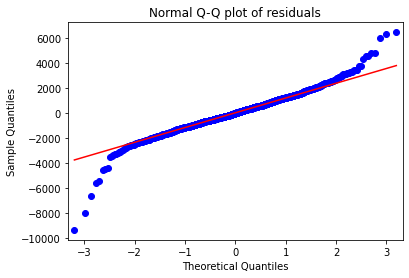

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_cars.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show

In [ ]:
list(np.where(model_cars.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [ ]:
model_influence_C=model_cars.get_influence()
(c_C,_)=model_influence_C.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

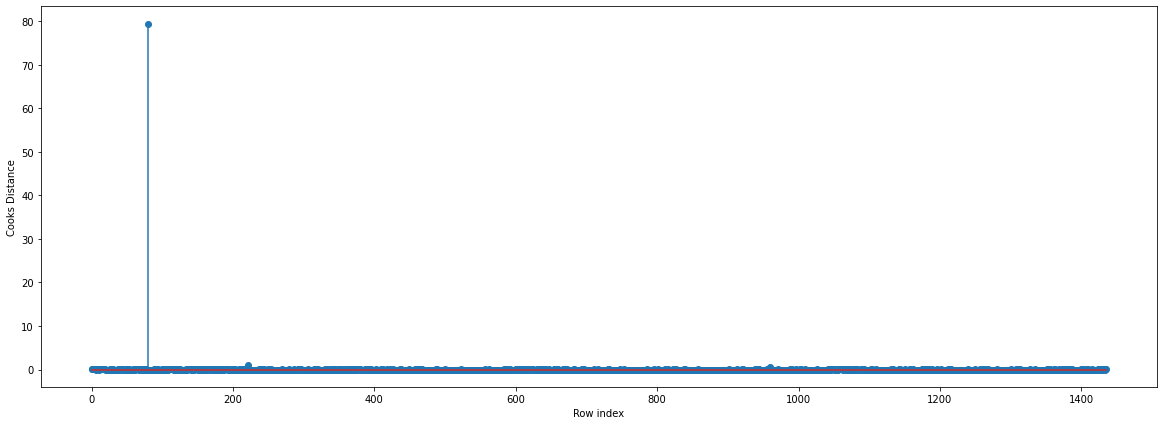

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c_C,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
(np.argmax(c_C),np.max(c_C))

(80, 79.52010624141955)

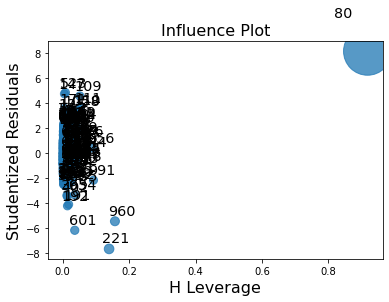

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_cars)
plt.show()

In [ ]:
k=toyota.shape[1]
n=toyota.shape[0]
levarage_cutoff=3*((k+1)/n)

In [ ]:
levarage_cutoff

0.08147632311977715

In [ ]:
toyota[toyota.index.isin([80])]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [ ]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
toyotan=pd.read_csv("/content/ToyotaCorolla.csv", encoding='latin1')

In [ ]:
toyotan.shape

(1436, 38)

In [ ]:
toyotan

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
toyota_=toyotan.drop(toyotan.index[80],axis=0).reset_index()

In [ ]:
toyota_.shape

(1435, 39)

In [ ]:
model_cars_n=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=toyota_).fit()

In [ ]:
model_cars_n.rsquared #rsquared has improved after removing the 80th row from the dataset

0.8693790488655819

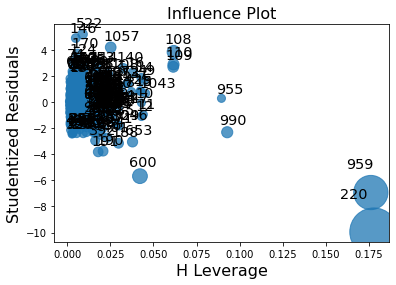

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_cars_n)
plt.show()

In [ ]:
k=toyota_.shape[1]
n=toyota_.shape[0]
levarage_cutoff=3*((k+1)/n)

In [ ]:
levarage_cutoff

0.08362369337979095

In [ ]:
toyota_1=toyota_.drop(toyota_.index[[220,959,955,990]], axis=0).reset_index()

In [ ]:
model_cars_n1=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data=toyota_1).fit()

In [ ]:
model_cars_n1.rsquared

0.8858404654714512

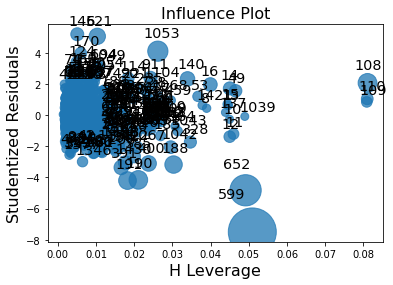

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_cars_n1)
plt.show()

In [ ]:
k=toyota_1.shape[1]
n=toyota_1.shape[0]
levarage_cutoff=3*((k+1)/n)

In [ ]:
levarage_cutoff

0.0859538784067086

In [ ]:
#no data points are outside the levarage, hence this is the final model

In [ ]:
#noting down theparmeters
model_cars_n1.params

Intercept       -14061.679242
Age_08_04         -111.772798
KM                  -0.016963
HP                  37.239946
cc                  -3.816917
Doors             -131.482177
Gears              280.052199
Quarterly_Tax        5.175273
Weight              30.867540
dtype: float64

In [ ]:
model_cars_n1.pvalues

Intercept         3.755636e-21
Age_08_04        5.835812e-277
KM                1.009630e-42
HP                3.076666e-39
cc                7.264344e-35
Doors             4.761829e-04
Gears             1.600350e-01
Quarterly_Tax     1.617547e-04
Weight           1.343278e-106
dtype: float64

In [ ]:
model_cars_n1.rsquared

0.8858404654714512

In [ ]:
model_influence_C=model_cars_n1.get_influence()
(c_C,_)=model_influence_C.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

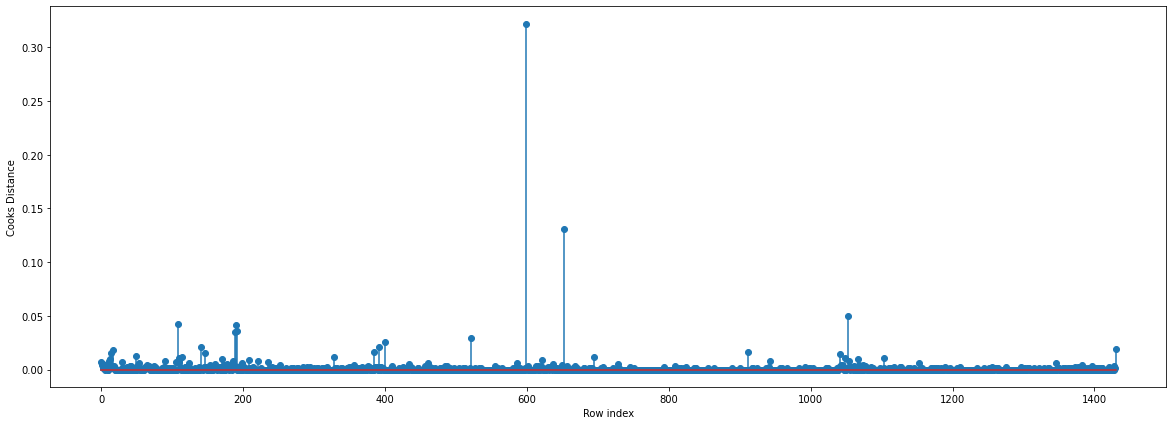

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota_1)),np.round(c_C,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
(np.argmax(c_C),np.max(c_C)) #no data point in the cooks distance plot of the final model has values greater than 1.0, hence this model is accepted

(599, 0.32207689505387443)

In [ ]:
predict_data=pd.DataFrame({"Age_08_04":30, "KM":38500, "HP":90, "cc":2000, "Doors":3, "Gears":5, "Quarterly_Tax":210, "Weight":1170}, index=[1])

In [ ]:
predict_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,30,38500,90,2000,3,5,210,1170


In [ ]:
model_cars_n1.predict(predict_data)

1    15857.483139
dtype: float64